# Monte Carlo Simulation for cell signalling

Monte Carlo simulation is a tool for solving probabilistic problems. If there are many different factors, or parameters, that contribute to a system's state, a good approach is to select random values for all those factors and simulate multiple occurence of each of those factors. This is the basis of Monte Carlo approach - run many simulations while changing the relevant parameters of the system and gain knowledge of any trends that could be analyzed.

In [1]:
import numpy as np
import math
import random
from matplotlib import pyplot as plt
from IPython.display import clear_output
import statistics as st

### Random walk

Random walk is a mathematical representation of a randomly moving object starting at a certain point which can be chosen on a coordinate system. Random walk simulations have many implementations. One such implementation is modeling random movements of molecules.

Mathematically the position of a randomly walking object at time $ t $ can be represented with the equation: 
    $$ x(t_k) \equiv x(t_0) + \sum_{i=1}^{k}\Delta{x(t_i)} $$
where $ x(t_0) $ is the position of the object in the beginning of the experiment and $\Delta{x}$ is a random displacement at a particular moment of time $t$.

To simulate random walk we can sample each displacement of the object as a random number from the standard normal distribution (a probability distribution with $\mu = 0$ and $\sigma = 1$). 


The actual movement of the object can be plotted with a simple function that takes a $2D$ array with the consecutive steps along $x$ and $y$ axis and makes a cumulative sum of the corresponding coordinates.
An important assumption is that the movement along the $x$
axis is independent from the movement along the $𝑦$ axis.

In [38]:
def random_walker (N):
    """Returns the x and y coordinates of randomly moving object making N number of steps as arrays"""
    step = np.random.normal(0, 1, (2, N))   #this gives a 2D array of random numbers between 0 and 1 
    walker = np.cumsum(step, axis = 1)    #This makes a cumulative sum of each of the coordinates 
    x_walk = [round(i, 1) for i in walker[0]]  
    y_walk = [round(k, 1) for k in walker[1]]
    
    return x_walk, y_walk


### Simulation
In order to simulate receptor-ligand binding, several coordinates can be selected to fix certain number of receptors for which endogenous ligand molecules are going to compete with molecules of interest. Such molecules of interest can be receptor antagonists that inactivate the receptor and block the signal response.

The parameters of the system include:
1. diffusion velocity of antigen molecules and molecules of interest 
2. concentration of molecules of each type
3. dissociation constant for the receptor for each type of molecules

Different rates of diffusion can be approximated simply with different number of steps for each type of molecule.

In [39]:
slow_diffusion = random_walker(35)
fast_diffusion = random_walker(123)

Going further the endogenous ligands are going to be referred to as ligands or slow moving molecules and the molecules of interest - as antagonists or fast moving molecules. 
The movement of one molecule of each type can be plotted for visualisation purpose:

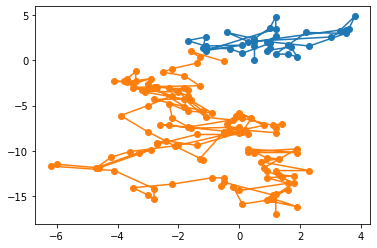

In [40]:
plt.plot(slow_diffusion[0], slow_diffusion[1], '-o');
plt.plot(fast_diffusion[0], fast_diffusion[1], '-o');

To simulate membrane-bound receptors a possible approach is to reserve several coordinate proximities for those receptors. The membrane can be idealised as a two dimensional surface with receptors spread on it. This idealisation is possible because for a simple model like this, there is no need to follow what happens after the ligand binding or if the binding molecule gets internalized within the cell. The membrane receptors can be represented as concentration of randomly positioned cooridnates in a Cartesian cooridnate system.

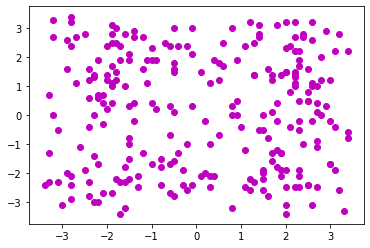

In [41]:
def receptors (n, r):
    """Sets n number of membrane-bound receptors in a Cartesian ccoridnate system"""
    x = []
    y = []
    for i in range(n):
        angle = np.random.uniform(0, 2*np.pi)
        radius = r*math.sqrt(np.random.uniform(1, 3)) #square root of the probability so the receptors are not predominantly in the center
        x.append(round(radius * np.cos(angle), 1))
        y.append(round(radius * np.sin(angle), 1))
        
    return x, y

plt.scatter(receptors(250, 2)[0],receptors(250, 2)[1], c = "m");
    


In order to simultaneously plot both receptors and slow and fast molecules, their coordinates can be taken as lists:

In [197]:
# receptor_coordinates = [xy for xy in zip(receptors(25, 2)[0], receptors(25, 2)[1])]
# slow_molecules_coordinates = [xy for xy in zip(slow_diffusion[0], slow_diffusion[1])]
# fast_molecules_coordinates = [xy for xy in zip(fast_diffusion[0], fast_diffusion[1])]


Let's say in the beginning we have 25 of each type of molecules: slow moving that represent an endogenous ligand, and fast moving that represent an antagonist. We can make a function which counts the number of ligands and antagonists that bind with free receptors depending on their speed of diffusion. For now the receptors and molecules cannot be reused.

In [43]:
def bind_receptor(free_receptors, antagonists, ligands):
    """Simulates bunding of antagonists and ligands to receptors with quantities given as 
    free_receptors, antagonists, ligands."""
    
    ligand_binded = 0
    antagonist_binded = 0
    coordinates_ligands = []
    coordinates_antagonists = []
    slow_diffusion = random_walker(42)
    fast_diffusion = random_walker(123)
    
    for i in range(ligands):
        slow_diffusion
        coordinates_ligands.append([xy for xy in zip(slow_diffusion[0], slow_diffusion[1])])
        
    for j in range(antagonists):
        fast_diffusion
        coordinates_antagonists.append([xy for xy in zip(fast_diffusion[0], fast_diffusion[1])])
    
    ligands_coordinates = [i for sublist in coordinates_ligands for i in sublist]
    antagonists_coordinates = [i for sublist in coordinates_antagonists for i in sublist]
    receptor_coordinates = [xy for xy in zip(receptors(free_receptors, 2)[0], receptors(free_receptors, 2)[1])]
        
    
    for mola in antagonists_coordinates:
        if mola in receptor_coordinates:
            antagonist_binded += 1  #find if an antagonists has the same coordinates as a receptor
            antagonists_coordinates.remove(mola) #remove the used antagonist
            receptor_coordinates.remove(mola) #remove the used receptor
    for moll in ligands_coordinates:
        if moll in receptor_coordinates:   
            ligand_binded += 1   #find if a ligand has the same coordinates as a receptor
            ligands_coordinates.remove(moll)  #remove the used ligand
            receptor_coordinates.remove(moll) #remove the used receptor

    return antagonist_binded, ligand_binded
    
bind_receptor(3500, 25, 25) #we put a larger number of receptors as a receptor cannot be represented 
                            #as a point-like object and should occupy larger space


(45, 19)

Making just one experiment gives a result that is totally inconclusive. To use a Monte Carlo approach we can simmulate the diffusion of ligands and antagonists and their binding to receptor clusters many times and to see what is the probability for binding of each molecule depending on their diffusion rate first. 

We can add calculation of the percentage of binded (with each type of molecule) / unbinded receptors; however we took a large number of receptors to represent receptor clusters that account for the larger size of the receptor molecule, so the real number of receptors can be taken as free_receptors/10.

In [44]:
number_experiments = 25
free_receptors = 3500
antagonists = random.randint(15, 25)
ligands = random.randint(15, 25)
def receptor_binding ():

    binded_antagonist = []
    binded_ligand = []
    for binding in range(number_experiments):
        binded_antagonist.append(bind_receptor(free_receptors, antagonists, ligands)[0])
        binded_ligand.append(bind_receptor(free_receptors, antagonists, ligands)[1])
    
    
    print("Number of binded antagonists for {0} experiments are {1} with mean {2}"
          .format(number_experiments, sum(binded_antagonist), sum(binded_antagonist)/(number_experiments)))
    print("Number of binded ligands for {0} experiments are {1} with mean {2}"
          .format(number_experiments, sum(binded_ligand), sum(binded_ligand)/(number_experiments)))
    
    print("======================================================")
    
    print("Antagonist binded percentage: ", (sum(binded_antagonist)*100)/(free_receptors*2.5))
    print("Ligand binded percentage: ", (sum(binded_ligand)*100)/(free_receptors*2.5))
    
    return binded_antagonist, binded_ligand

receptor_binding()

Number of binded antagonists for 25 experiments are 360 with mean 14.4
Number of binded ligands for 25 experiments are 246 with mean 9.84
Antagonist binded percentage:  4.114285714285714
Ligand binded percentage:  2.8114285714285714


([9,
  14,
  19,
  14,
  1,
  7,
  3,
  12,
  30,
  8,
  4,
  12,
  5,
  8,
  4,
  27,
  15,
  36,
  17,
  24,
  6,
  6,
  6,
  44,
  29],
 [7,
  27,
  1,
  10,
  15,
  0,
  11,
  7,
  11,
  28,
  9,
  6,
  8,
  6,
  26,
  3,
  2,
  19,
  8,
  10,
  0,
  23,
  5,
  3,
  1])

We can plot a histogram of the results from the 25 experiments to see what is the distribution of binded molecules of each type, we also can plot the mean of the binding events for each type of molecule.

Number of binded antagonists for 25 experiments are 426 with mean 17.04
Number of binded ligands for 25 experiments are 329 with mean 13.16
Antagonist binded percentage:  4.868571428571428
Ligand binded percentage:  3.76


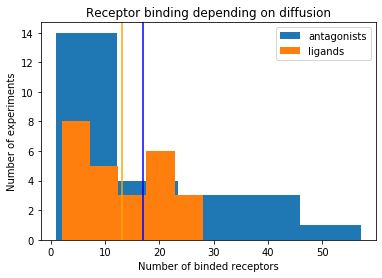

In [45]:
binded_antagonist, binded_ligand = receptor_binding()
plt.hist(binded_antagonist, bins = 5, label = "antagonists")
plt.hist(binded_ligand, bins = 5, label = "ligands")

plt.xlabel("Number of binded receptors")
plt.ylabel("Number of experiments")
plt.axvline(st.mean(binded_antagonist), c = "blue")
plt.axvline(st.mean(binded_ligand), c = "orange")
plt.title("Receptor binding depending on diffusion")
plt.legend()
plt.show()

Additionally we can experiment with differences in the number of molecules and run the simulation two times - with larger number ligands and larger number antagonists and plot the results.

Number of binded antagonists for 10 experiments are 158 with mean 15.8
Number of binded ligands for 10 experiments are 137 with mean 13.7
Antagonist binded percentage:  1.8057142857142856
Ligand binded percentage:  1.5657142857142856


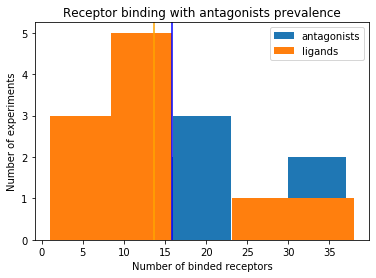

In [46]:
number_experiments = 10
free_receptors = 3500
antagonists = 35
ligands = 10
binded_antagonist, binded_ligand = receptor_binding()
plt.hist(binded_antagonist, bins = 5, label = "antagonists")
plt.hist(binded_ligand, bins = 5, label = "ligands")

plt.xlabel("Number of binded receptors")
plt.ylabel("Number of experiments")
plt.axvline(st.mean(binded_antagonist), c = "blue")
plt.axvline(st.mean(binded_ligand), c = "orange")
plt.title("Receptor binding with antagonists prevalence")
plt.legend()
plt.show()

Number of binded antagonists for 10 experiments are 217 with mean 21.7
Number of binded ligands for 10 experiments are 151 with mean 15.1
Antagonist binded percentage:  2.48
Ligand binded percentage:  1.7257142857142858


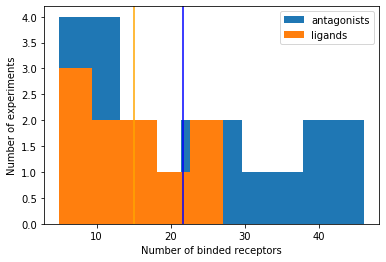

In [37]:
number_experiments = 10
free_receptors = 3500
antagonists = 10
ligands = 35
binded_antagonist, binded_ligand = receptor_binding()
plt.hist(binded_antagonist, bins = 5, label = "antagonists")
plt.hist(binded_ligand, bins = 5, label = "ligands")

plt.xlabel("Number of binded receptors")
plt.ylabel("Number of experiments")
plt.axvline(st.mean(binded_antagonist), c = "blue")
plt.axvline(st.mean(binded_ligand), c = "orange")
plt.title("Receptor binding with ligands prevalence")
plt.legend()
plt.show()

### Conclusion
From just a few experiments it can be concluded that if the diffusion rate for the antagonists (i.e. the faster molecules) is three times larger than for the ligands, the binding rate is about 1/2 larger. Small differences in molecule numbers do not appear to affect much the distribution; however the experiment has to be run much more times to see the trend. 

### Further investigations
An important parameter for the system is the duration of the period for which each type of molecule is bounded to the receptor - the dissociation constant which describes the affinity between the receptor and ligand.

# Resources

1. https://towardsdatascience.com/monte-carlo-simulations-with-python-part-1-f5627b7d60b0
2. https://www.researchgate.net/publication/8115083_Monte_Carlo_simulations_of_receptor_dynamics_Insights_into_cell_signaling: implementaion in biology
3. https://www.youtube.com/watch?v=BfS2H1y6tzQ - video on random movement
4. https://courses.edx.org/courses/course-v1:HarvardX+PH526x+1T2020/courseware/317ce880d7644d35840b1f734be76b06/391063d8f58242e892efafc9903b36e8/?child=first
5. Monte Carlo random walk - http://zwmiller.com/projects/notebooks/random_walk.html
6. https://blogs.sas.com/content/iml/2016/03/30/generate-uniform-2d-ball.html